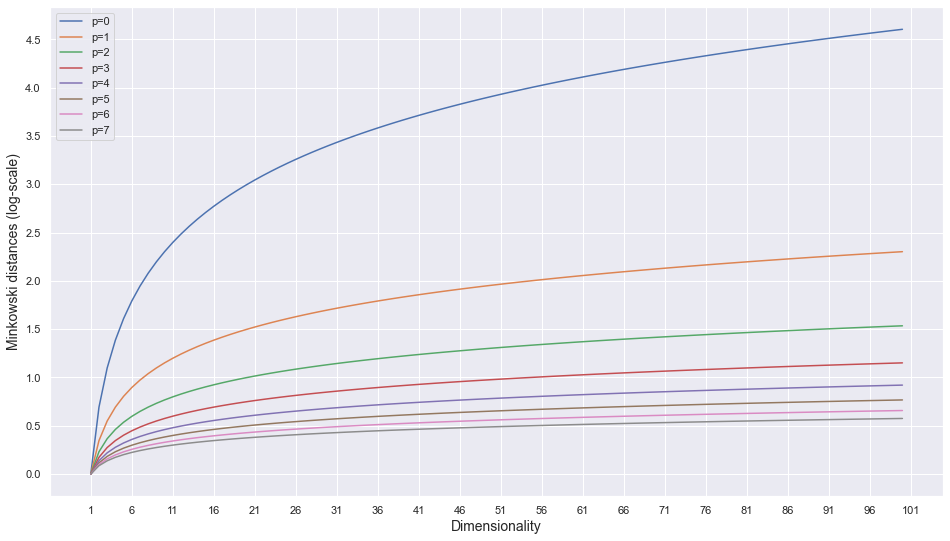

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cdist


# For reproducibility
np.random.seed(1000)


if __name__ == '__main__':
    # Create the distance matrix
    distances = np.zeros(shape=(8, 100))

    for i in range(1, distances.shape[0] + 1):
        for j in range(1, distances.shape[1] + 1):
            distances[i - 1, j - 1] = np.log(cdist(np.zeros(shape=(1, j)), np.ones(shape=(1, j)),
                                                   metric='minkowski', p=i)[0][0])

    # Show the distances
    sns.set()

    fig, ax = plt.subplots(figsize=(16, 9))

    for i in range(distances.shape[0]):
        ax.plot(np.arange(1, distances.shape[1] + 1, 1), distances[i], label='p={}'.format(i))

    ax.set_xlabel('Dimensionality', fontsize=14)
    ax.set_ylabel('Minkowski distances (log-scale)', fontsize=14)
    ax.legend()
    ax.set_xticks(np.arange(1, distances.shape[1] + 2, 5))
    ax.set_yticks(np.arange(0, 5, 0.5))

    plt.show()

# K-Means

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

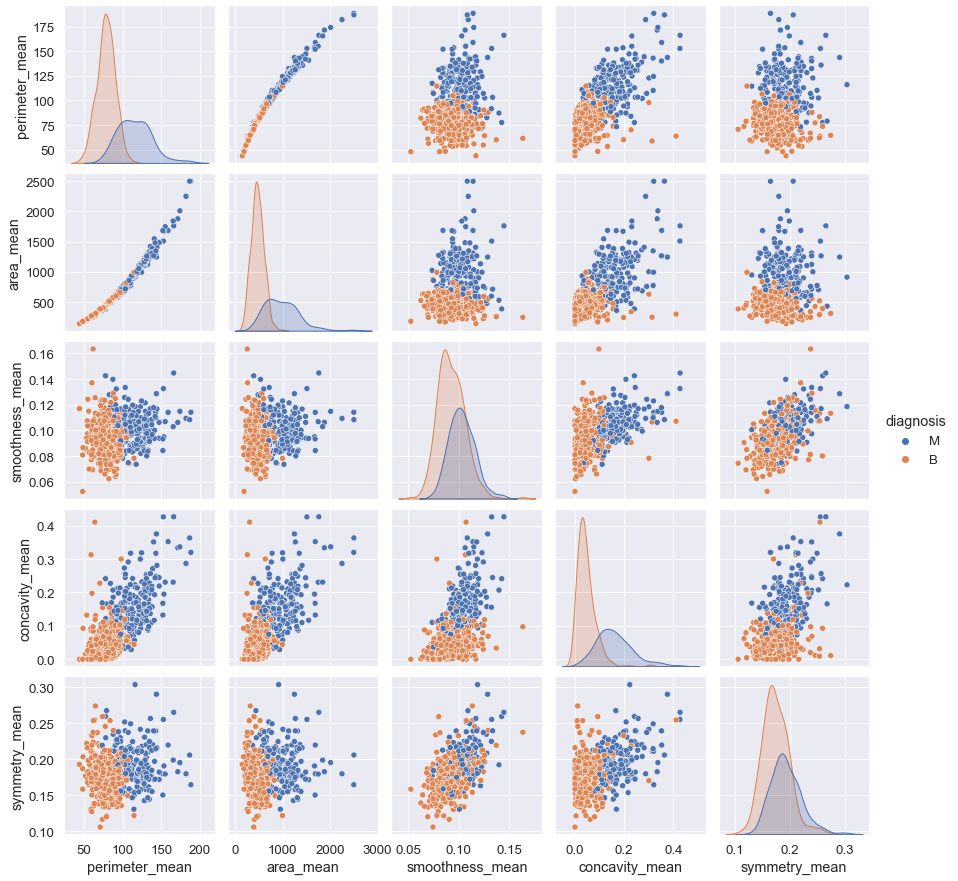

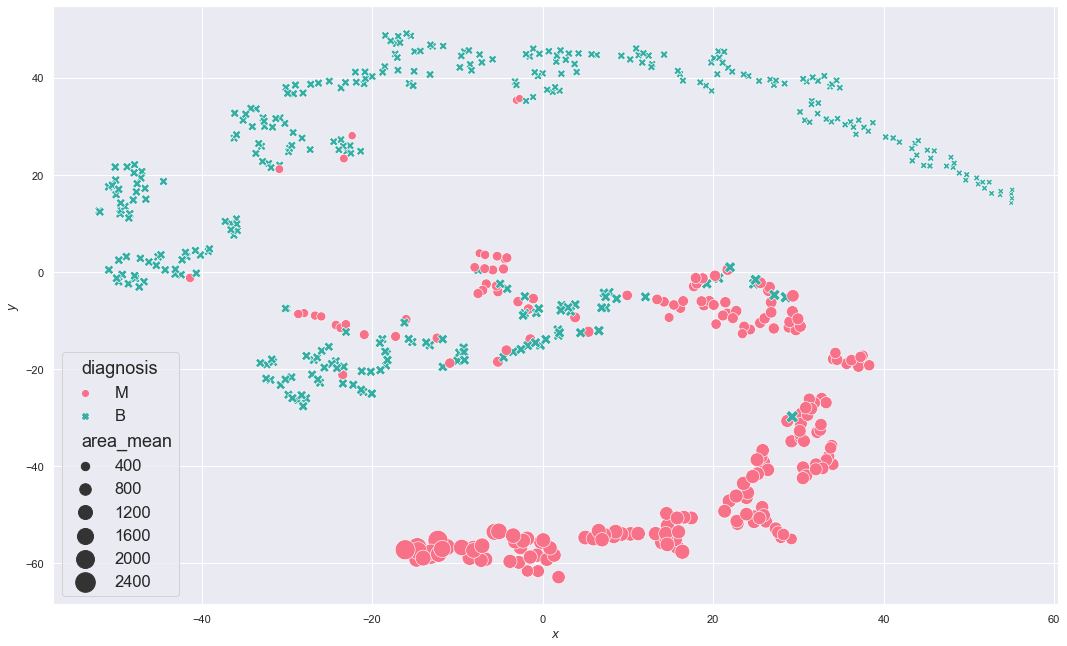

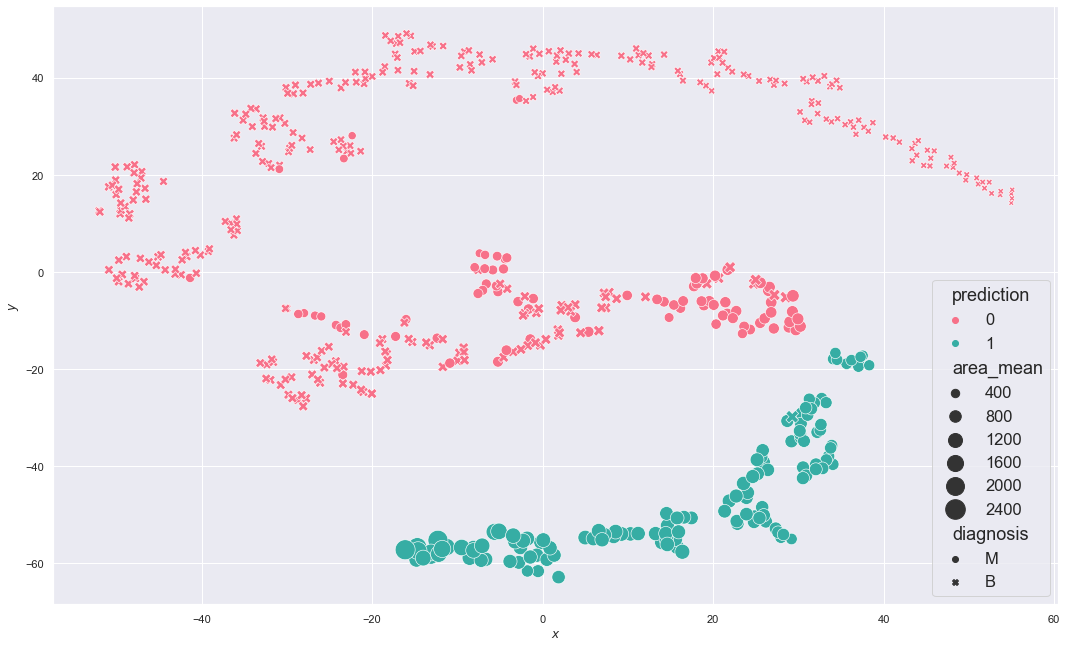

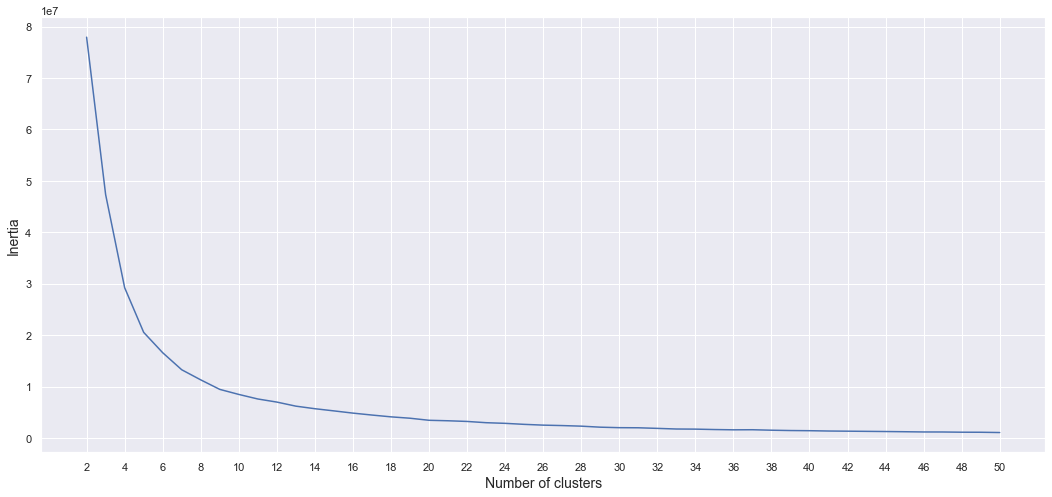

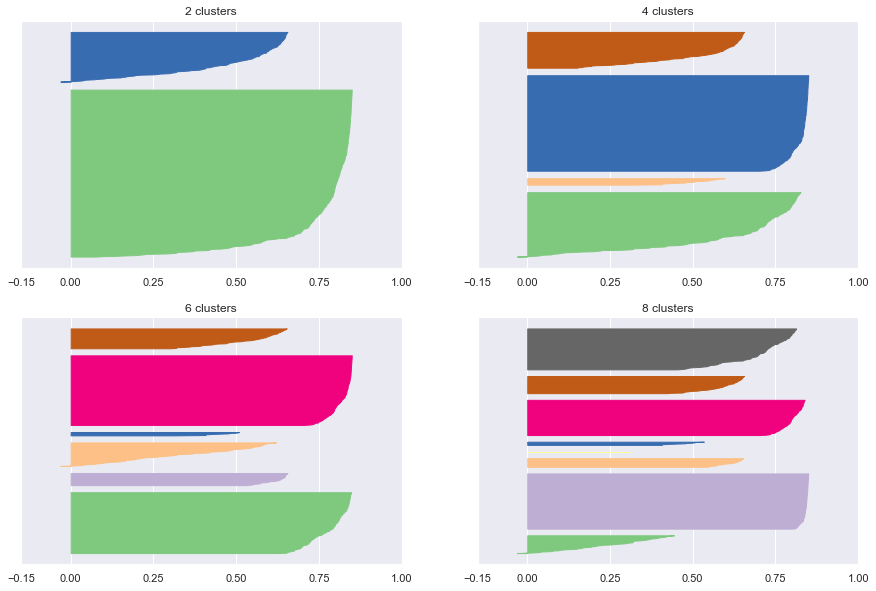

Completeness: 0.5168089972809706
Homogeneity: 0.42229071246999117
V-Score: 0.46479332792160793
Adj. Mutual info: 0.46400471284520867
Adj. Rand score: 0.49142453622455523


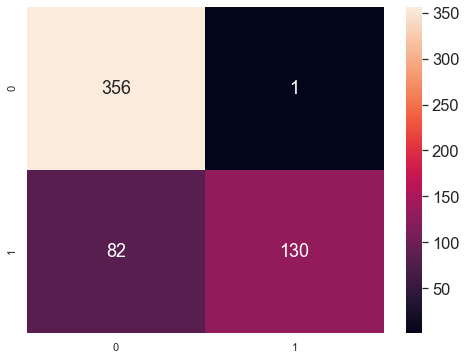

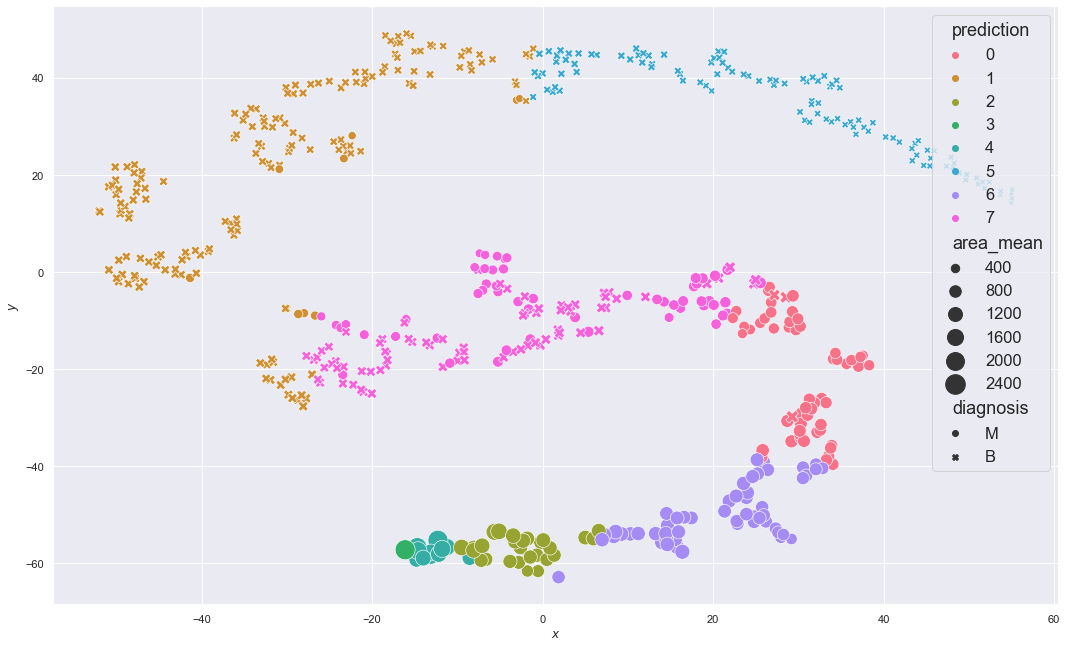

       perimeter_mean    area_mean  smoothness_mean  concavity_mean  \
count       83.000000    83.000000        83.000000       83.000000   
mean       136.112048  1325.819277         0.101976        0.196905   
std         15.960434   306.217168         0.011234        0.078274   
min        102.900000   803.100000         0.080200        0.086900   
25%        127.350000  1153.500000         0.094145        0.144850   
50%        132.900000  1260.000000         0.101800        0.169200   
75%        141.100000  1385.000000         0.108450        0.231450   
max        188.500000  2501.000000         0.144700        0.426800   

       symmetry_mean  
count      83.000000  
mean        0.192143  
std         0.027285  
min         0.142800  
25%         0.176600  
50%         0.187500  
75%         0.208350  
max         0.290600  
       perimeter_mean   area_mean  smoothness_mean  concavity_mean  \
count      116.000000  116.000000       116.000000      116.000000   
mean        6

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, \
    adjusted_mutual_info_score, adjusted_rand_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.cluster import contingency_matrix


# For reproducibility
np.random.seed(1000)


# Download from: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
# Change <data_folder> with the actual path
bc_dataset_path = 'wdbc.data'

bc_dataset_columns = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                      'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                      'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                      'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                      'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                      'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                      'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

if __name__ == '__main__':
    # Load the dataset
    df = pd.read_csv(bc_dataset_path, index_col=0, names=bc_dataset_columns).fillna(0.0)

    # Show the overall statistical properties
    print(df.describe())

    # Show the pair-plot
    sns.set()

    with sns.plotting_context("notebook", font_scale=1.2):
        sns.pairplot(df,
                     vars=['perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean'],
                     hue="diagnosis")

    plt.show()

    # Project the dataset on a bidimensional plane
    cdf = df.drop(['diagnosis'], axis=1)

    tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
    data_tsne = tsne.fit_transform(cdf)

    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
    dff = pd.concat([df, df_tsne], axis=1)

    # Show the diagram
    fig, ax = plt.subplots(figsize=(18, 11))

    with sns.plotting_context("notebook", font_scale=1.5):
        sns.scatterplot(x='x',
                        y='y',
                        hue='diagnosis',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=dff,
                        ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()

    # Perform a K-Means clustering with K=2
    km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
    Y_pred = km.fit_predict(cdf)

    df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
    kmdff = pd.concat([dff, df_km], axis=1)

    # Show the clustering result
    fig, ax = plt.subplots(figsize=(18, 11))

    with sns.plotting_context("notebook", font_scale=1.5):
        sns.scatterplot(x='x',
                        y='y',
                        hue='prediction',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=kmdff,
                        ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()

    # Compute the inertia
    inertias = []

    for i in range(2, 51):
        km = KMeans(n_clusters=i, max_iter=1000, random_state=1000)
        km.fit(cdf)
        inertias.append(km.inertia_)

    # Show the plot inertia vs. no. clusters
    fig, ax = plt.subplots(figsize=(18, 8))

    ax.plot(np.arange(2, 51, 1), inertias)
    ax.set_xlabel('Number of clusters', fontsize=14)
    ax.set_ylabel('Inertia', fontsize=14)
    ax.set_xticks(np.arange(2, 51, 2))

    plt.show()

    nb_clusters = [2, 4, 6, 8]
    mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

    # Show the silhouette plots
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    for i, n in enumerate(nb_clusters):
        km = KMeans(n_clusters=n, random_state=1000)
        Y = km.fit_predict(cdf)
        df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
        kmdff = pd.concat([dff, df_km], axis=1)

        silhouette_values = silhouette_samples(cdf, kmdff['prediction'])

        ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
        ax[mapping[i]].set_yticks([])
        ax[mapping[i]].set_title('%d clusters' % n)
        ax[mapping[i]].set_xlim([-0.15, 1])
        y_lower = 20

        for t in range(n):
            ct_values = silhouette_values[Y == t]
            ct_values.sort()

            y_upper = y_lower + ct_values.shape[0]

            color = cm.Accent(float(t) / n)
            ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, ct_values, facecolor=color, edgecolor=color)

            y_lower = y_upper + 20

    plt.show()

    # Compute the other metrics for K=2
    km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
    Y_pred = km.fit_predict(cdf)
    df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
    kmdff = pd.concat([dff, df_km], axis=1)

    print('Completeness: {}'.format(completeness_score(kmdff['diagnosis'], kmdff['prediction'])))
    print('Homogeneity: {}'.format(homogeneity_score(kmdff['diagnosis'], kmdff['prediction'])))
    print('V-Score: {}'.format(v_measure_score(kmdff['diagnosis'], kmdff['prediction'])))
    print('Adj. Mutual info: {}'.format(adjusted_mutual_info_score(kmdff['diagnosis'], kmdff['prediction'])))
    print('Adj. Rand score: {}'.format(adjusted_rand_score(kmdff['diagnosis'], kmdff['prediction'])))

    # Compute and show the contingency matrix
    cm = contingency_matrix(kmdff['diagnosis'].apply(lambda x: 0 if x == 'B' else 1), kmdff['prediction'])

    fig, ax = plt.subplots(figsize=(8, 6))

    with sns.plotting_context("notebook", font_scale=1.5):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax)

    plt.show()

    # Perform a K-Means clustering with K=8
    km = KMeans(n_clusters=8, max_iter=1000, random_state=1000)
    Y_pred = km.fit_predict(cdf)

    df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
    kmdff = pd.concat([dff, df_km], axis=1)

    # Show the result
    fig, ax = plt.subplots(figsize=(18, 11))

    with sns.plotting_context("notebook", font_scale=1.5):
        sns.scatterplot(x='x',
                        y='y',
                        hue='prediction',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 8),
                        data=kmdff,
                        ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()

    # Show the statistical description of two clusters
    sdff = dff[(dff.x > -25.0) & (dff.x < 30.0) & (dff.y > -60.0) & (dff.y < -40.0)]
    print(sdff[['perimeter_mean', 'area_mean', 'smoothness_mean',
                'concavity_mean', 'symmetry_mean']].describe())

    sdff = dff[(dff.x > -10.0) & (dff.y > 20.0) & (dff.y < 50.0)]
    print(sdff[['perimeter_mean', 'area_mean', 'smoothness_mean',
                'concavity_mean', 'symmetry_mean']].describe())

# Spectral Clustering

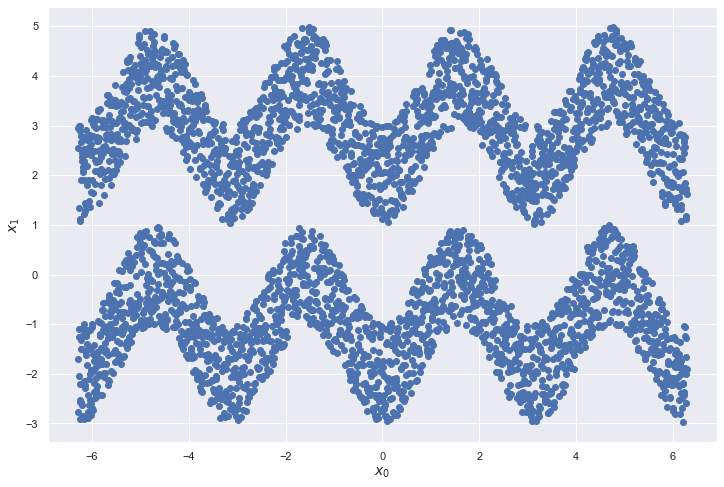

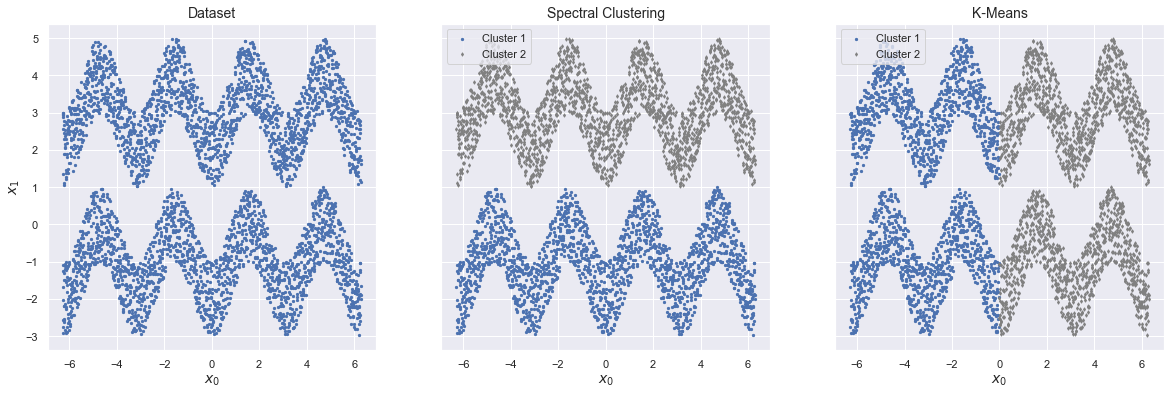

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import SpectralClustering, KMeans


# For reproducibility
np.random.seed(1000)


nb_samples = 2000


if __name__ == '__main__':
    # Create the dataset
    X0 = np.expand_dims(np.linspace(-2 * np.pi, 2 * np.pi, nb_samples), axis=1)
    Y0 = -2.0 - np.cos(2.0 * X0) + np.random.uniform(0.0, 2.0, size=(nb_samples, 1))

    X1 = np.expand_dims(np.linspace(-2 * np.pi, 2 * np.pi, nb_samples), axis=1)
    Y1 = 2.0 - np.cos(2.0 * X0) + np.random.uniform(0.0, 2.0, size=(nb_samples, 1))

    data_0 = np.concatenate([X0, Y0], axis=1)
    data_1 = np.concatenate([X1, Y1], axis=1)
    data = np.concatenate([data_0, data_1], axis=0)

    # Show the dataset
    sns.set()

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.scatter(data[:, 0], data[:, 1])
    ax.set_xlabel(r'$x_0$', fontsize=14)
    ax.set_ylabel(r'$x_1$', fontsize=14)

    plt.show()

    # Perform the clustering
    km = KMeans(n_clusters=2, random_state=1000)
    sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=2.0, random_state=1000)

    Y_pred_km = km.fit_predict(data)
    Y_pred_sc = sc.fit_predict(data)

    # Show the results
    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    ax[0].scatter(data[:, 0], data[:, 1], c='b', s=5)

    ax[1].scatter(data[Y_pred_sc == 0, 0], data[Y_pred_sc == 0, 1], marker='o', s=5, c='b', label='Cluster 1')
    ax[1].scatter(data[Y_pred_sc == 1, 0], data[Y_pred_sc == 1, 1], marker='d', s=5, c='gray', label='Cluster 2')

    ax[2].scatter(data[Y_pred_km == 0, 0], data[Y_pred_km == 0, 1], marker='o', c='b', s=5, label='Cluster 1')
    ax[2].scatter(data[Y_pred_km == 1, 0], data[Y_pred_km == 1, 1], marker='d', c='gray', s=5, label='Cluster 2')

    ax[0].set_title('Dataset', fontsize=14)
    ax[0].set_xlabel(r'$x_0$', fontsize=14)
    ax[0].set_ylabel(r'$x_1$', fontsize=14)

    ax[1].set_title('Spectral Clustering', fontsize=14)
    ax[1].set_xlabel(r'$x_0$', fontsize=14)
    ax[1].legend()

    ax[2].set_title('K-Means', fontsize=14)
    ax[2].set_xlabel(r'$x_0$', fontsize=14)
    ax[2].legend()

    plt.show()

# Mean Shift

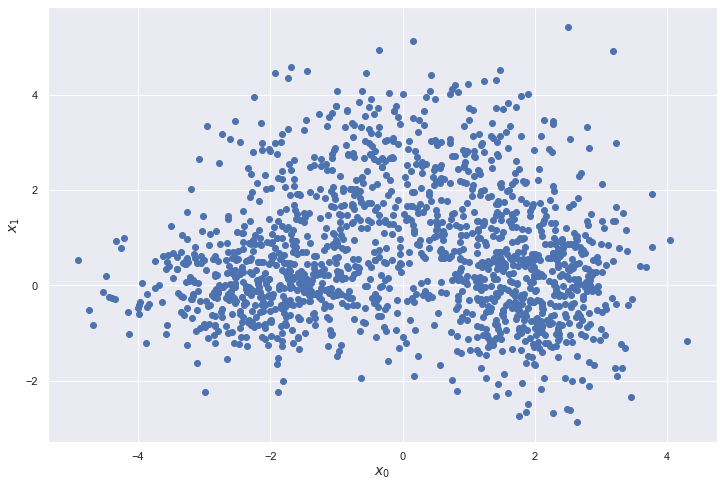

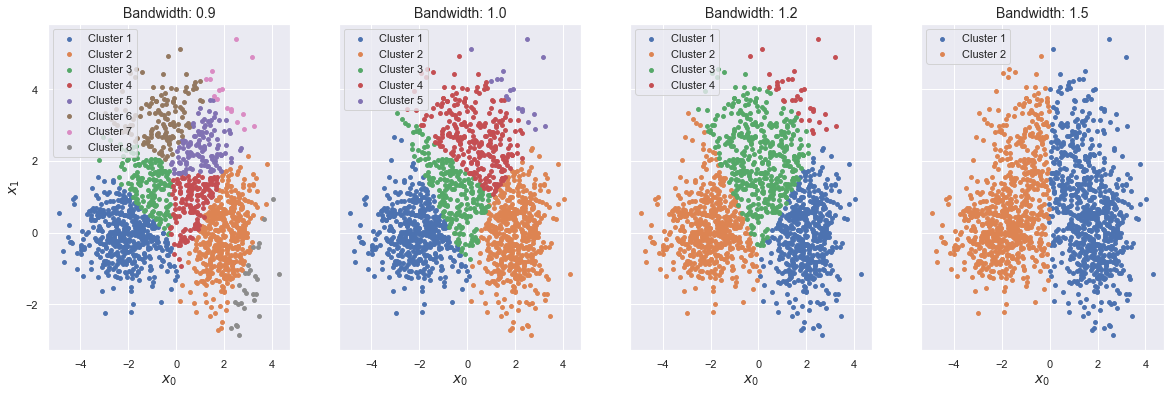

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MeanShift


# For reproducibility
np.random.seed(1000)


nb_samples = 500
mss = []
Y_preds = []
bandwidths = [0.9, 1.0, 1.2, 1.5]


if __name__ == '__main__':
    # Create the dataset
    data_1 = np.random.multivariate_normal([-2.0, 0.0], np.diag([1.0, 0.5]), size=(nb_samples,))
    data_2 = np.random.multivariate_normal([0.0, 2.0], np.diag([1.5, 1.5]), size=(nb_samples,))
    data_3 = np.random.multivariate_normal([2.0, 0.0], np.diag([0.5, 1.0]), size=(nb_samples,))

    data = np.concatenate([data_1, data_2, data_3], axis=0)

    # Show the original dataset
    sns.set()

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.scatter(data[:, 0], data[:, 1])
    ax.set_xlabel(r'$x_0$', fontsize=14)
    ax.set_ylabel(r'$x_1$', fontsize=14)

    plt.show()

    # Perform the clustering with different bandwidths
    for b in bandwidths:
        ms = MeanShift(bandwidth=b)
        Y_preds.append(ms.fit_predict(data))
        mss.append(ms)

    # Show the results
    fig, ax = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    for j, b in enumerate(bandwidths):
        for i in range(mss[j].cluster_centers_.shape[0]):
            ax[j].scatter(data[Y_preds[j] == i, 0], data[Y_preds[j] == i, 1], marker='o', s=15,
                          label='Cluster {}'.format(i + 1))

        ax[j].set_xlabel(r'$x_0$', fontsize=14)
        ax[j].set_title('Bandwidth: {}'.format(b), fontsize=14)
        ax[j].legend()

    ax[0].set_ylabel(r'$x_1$', fontsize=14)

    plt.show()